In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
new_regions = [
    "Arab_World",
    "East_Asia_&_Pacific",
    "European_Union",
    "High_income",
    "Latin_America_&_Caribbean",
    "Low_income",
    "Middle_income",
    "North_America",
    "OECD_members",
    "South_Asia",
    "Sub-Saharan_Africa",
    "World"
]

In [3]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

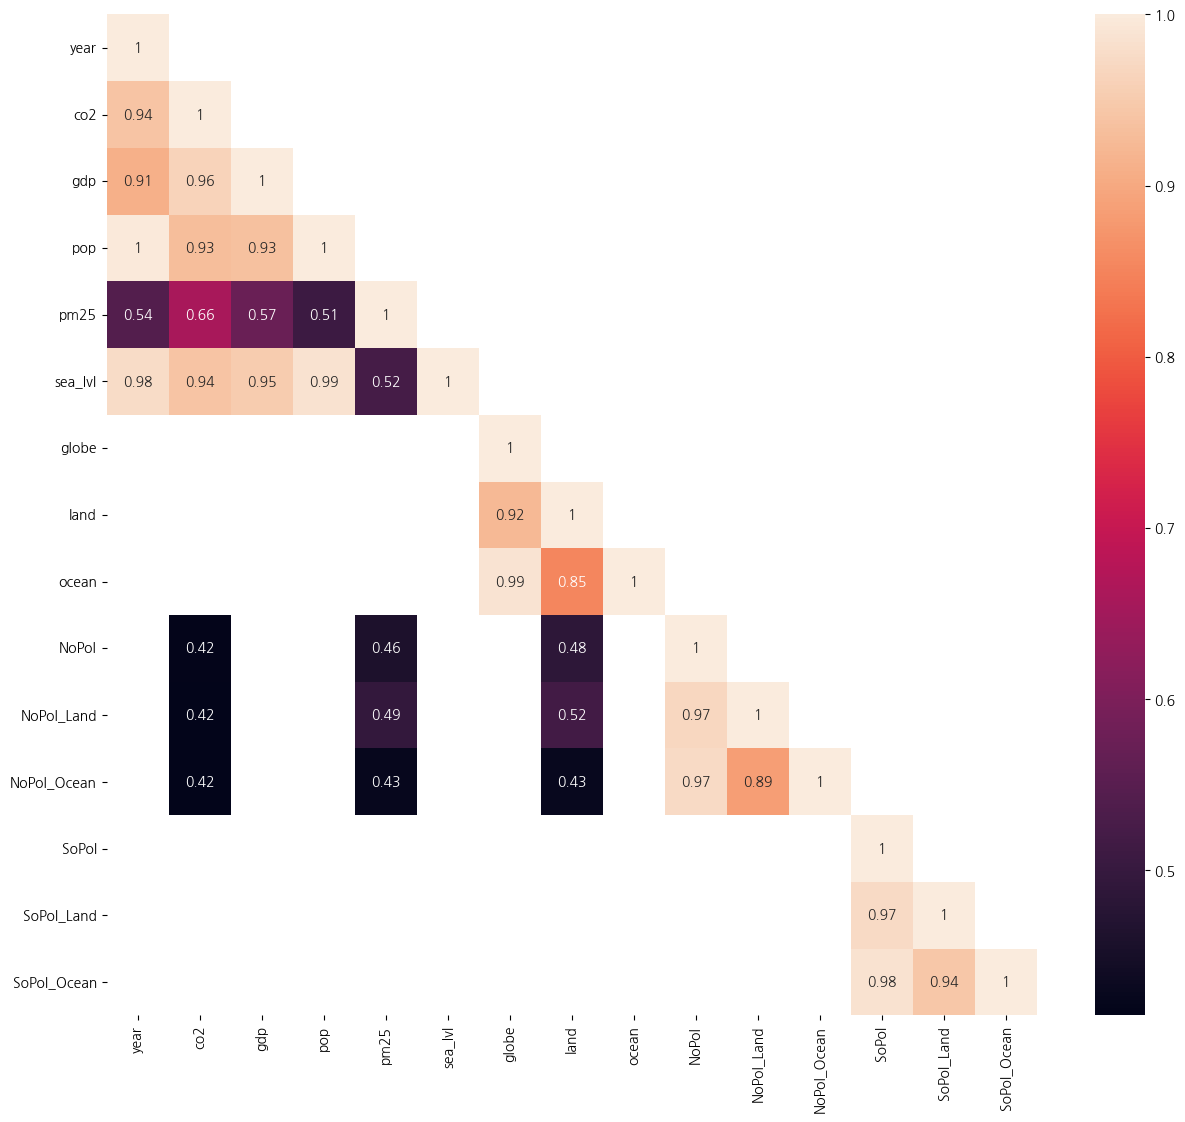

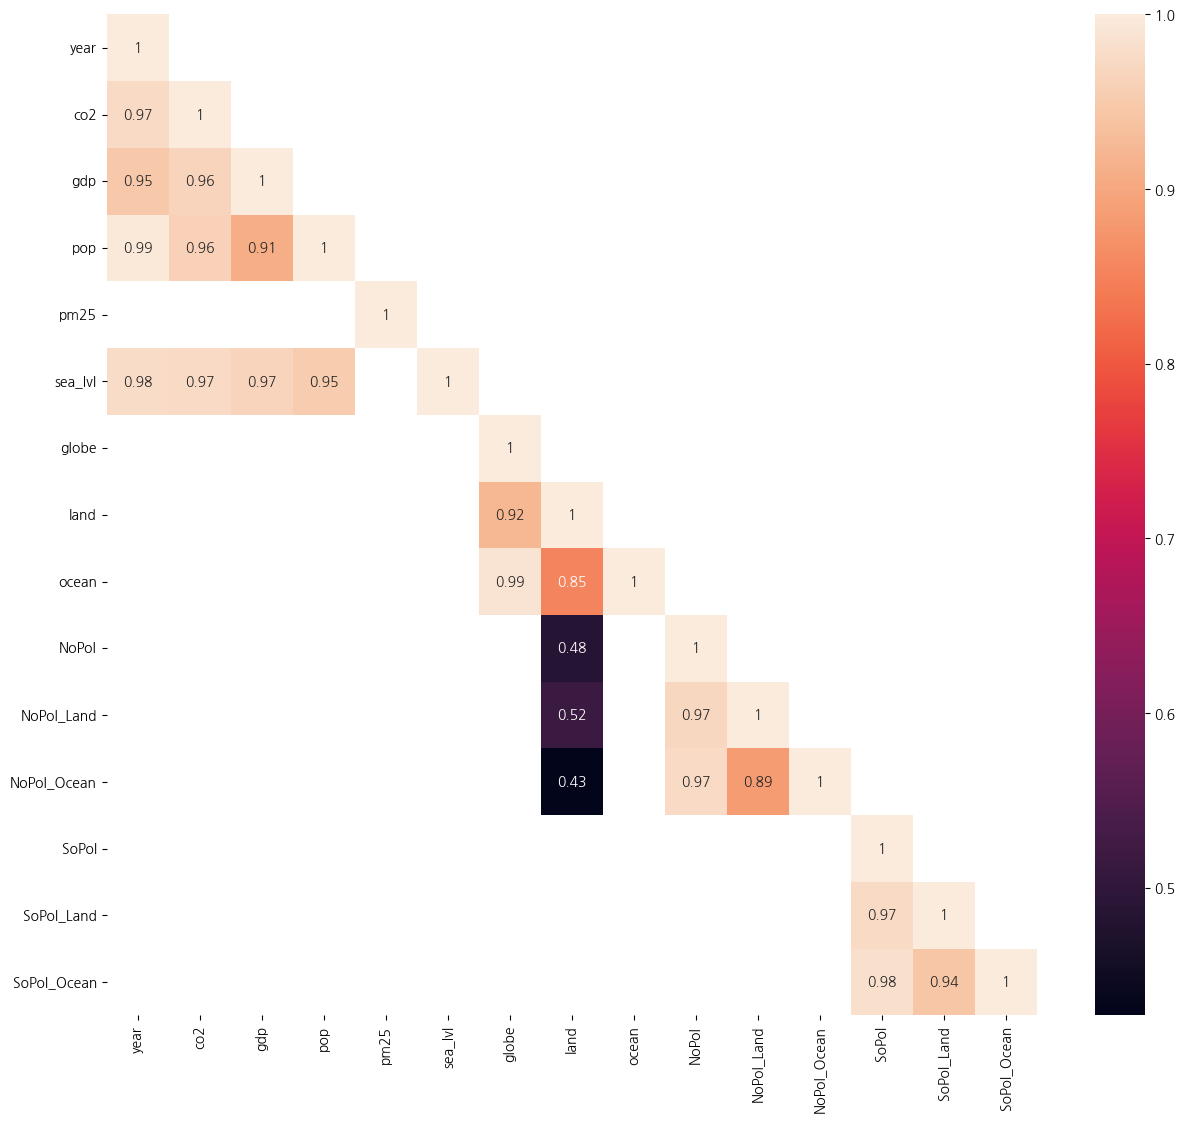

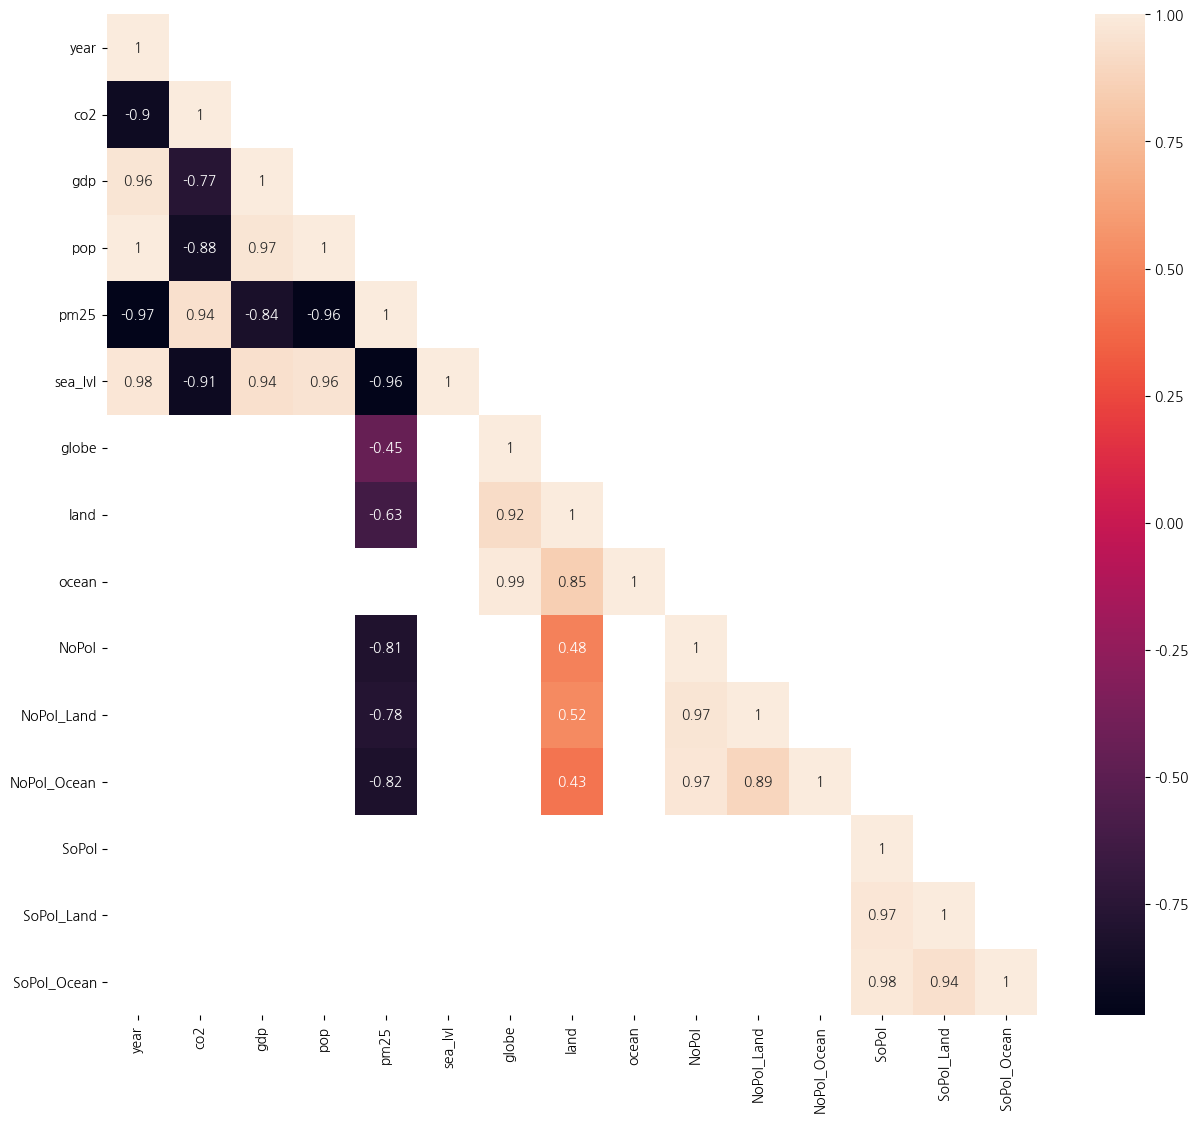

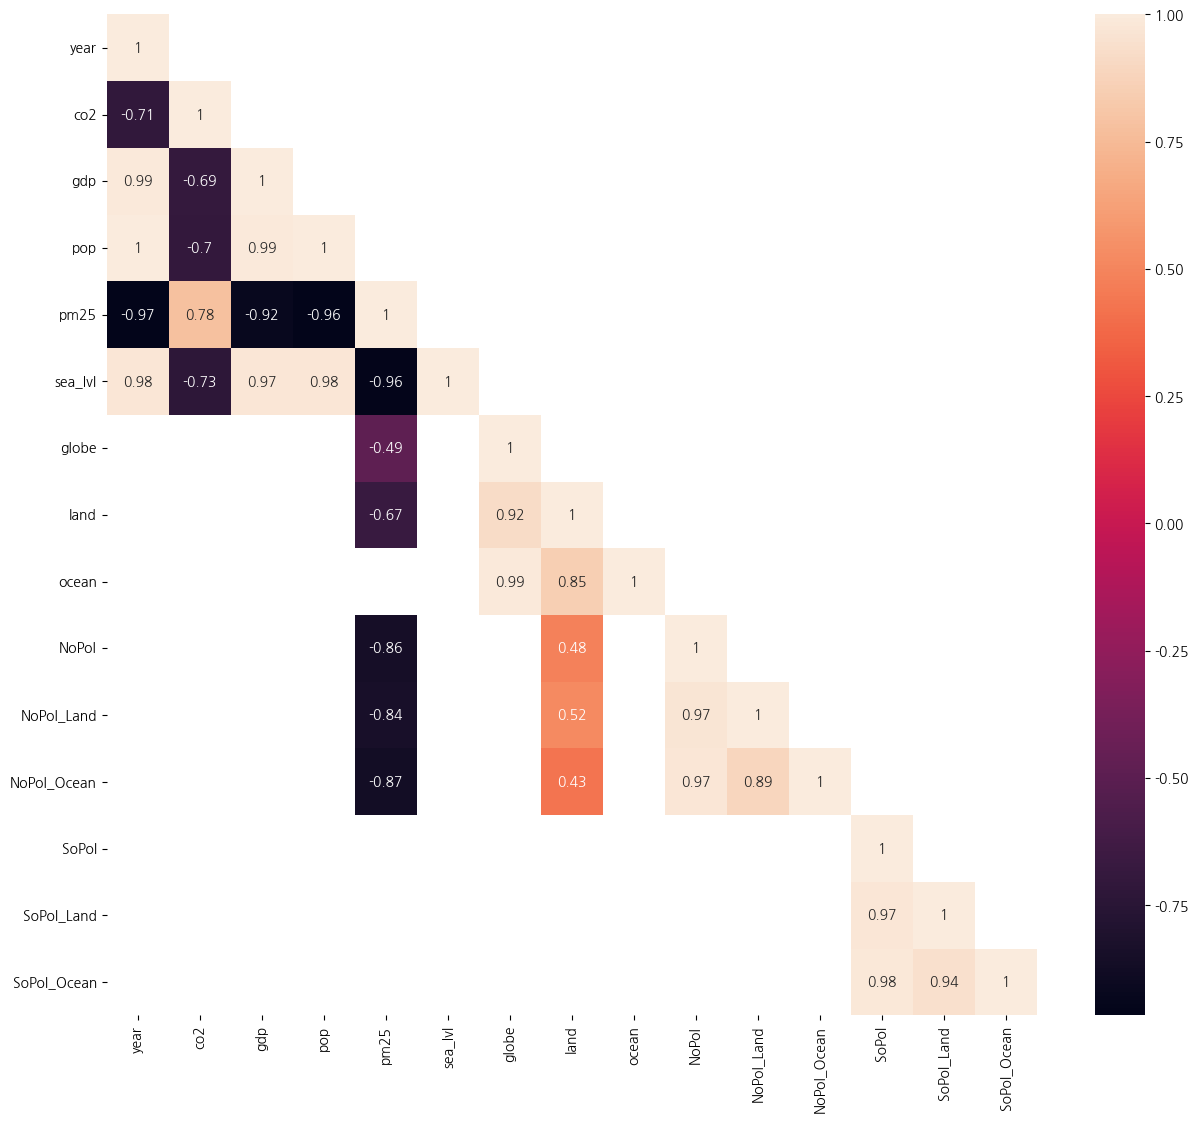

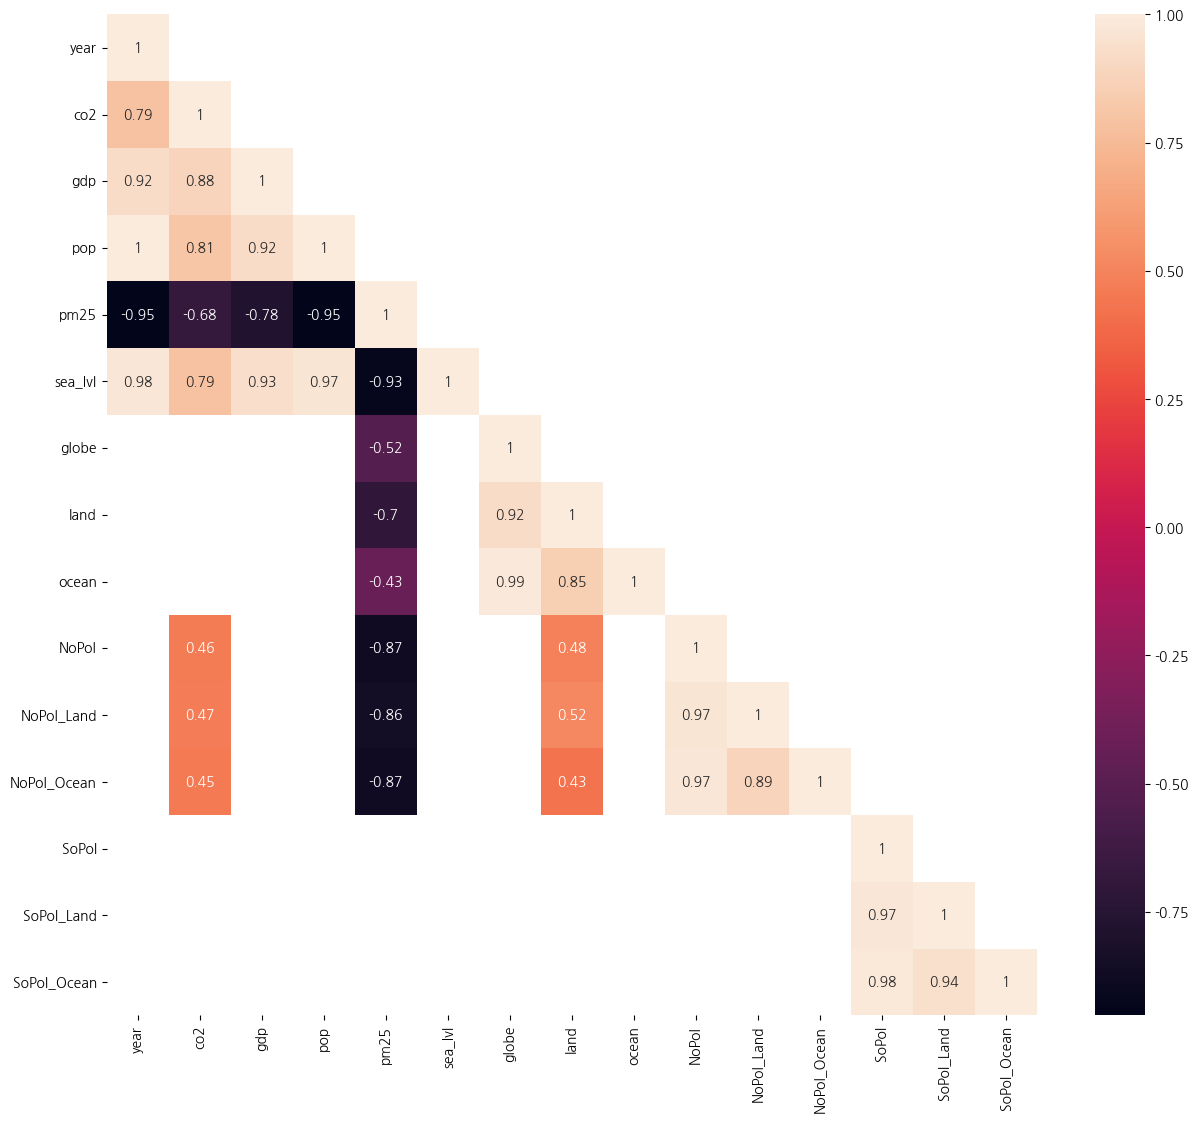

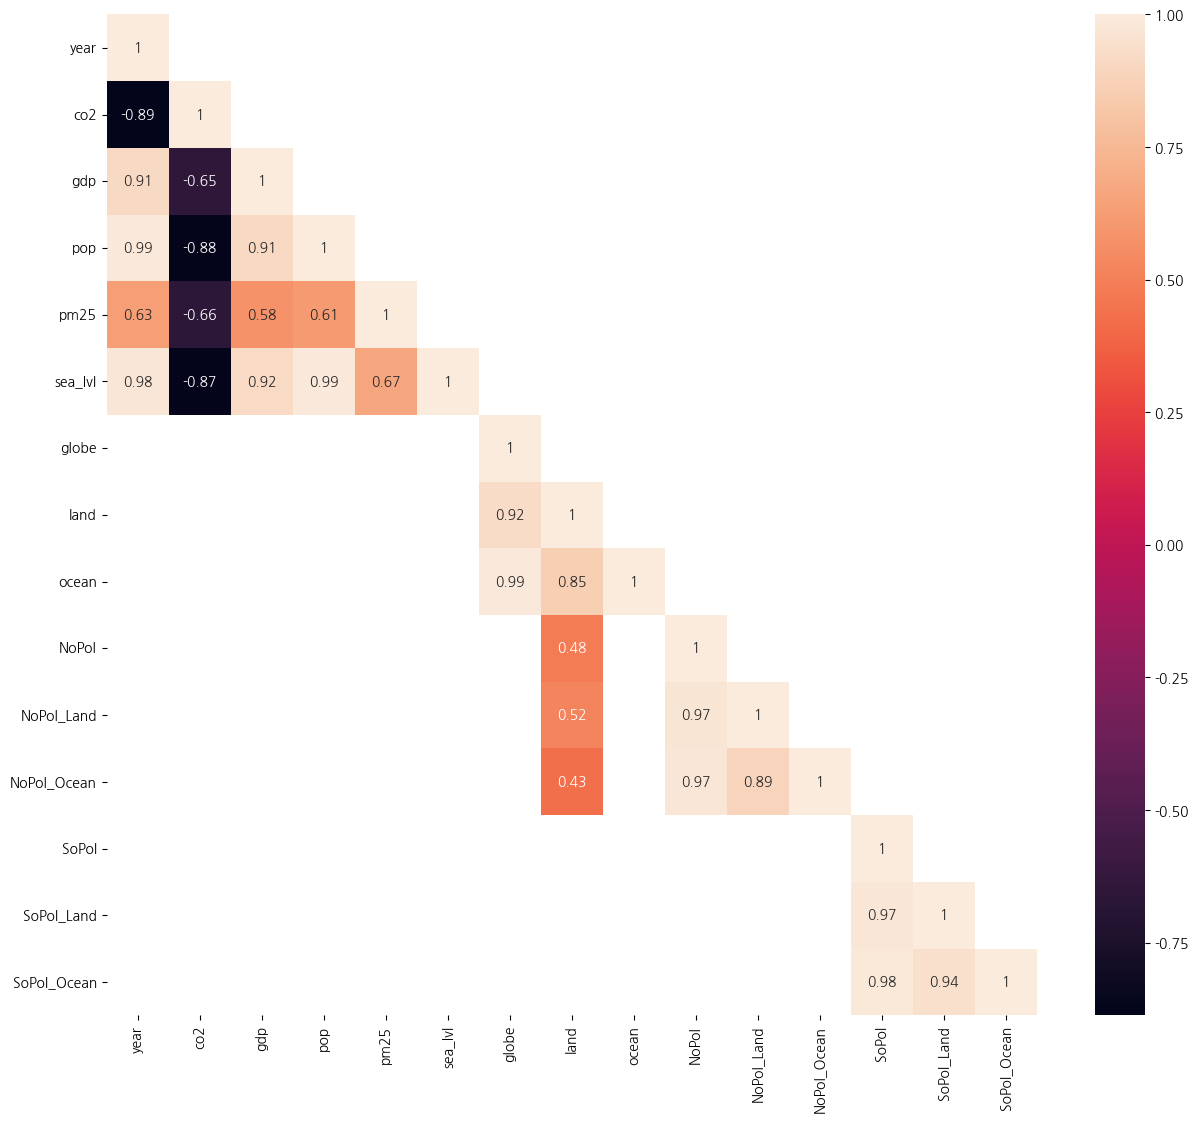

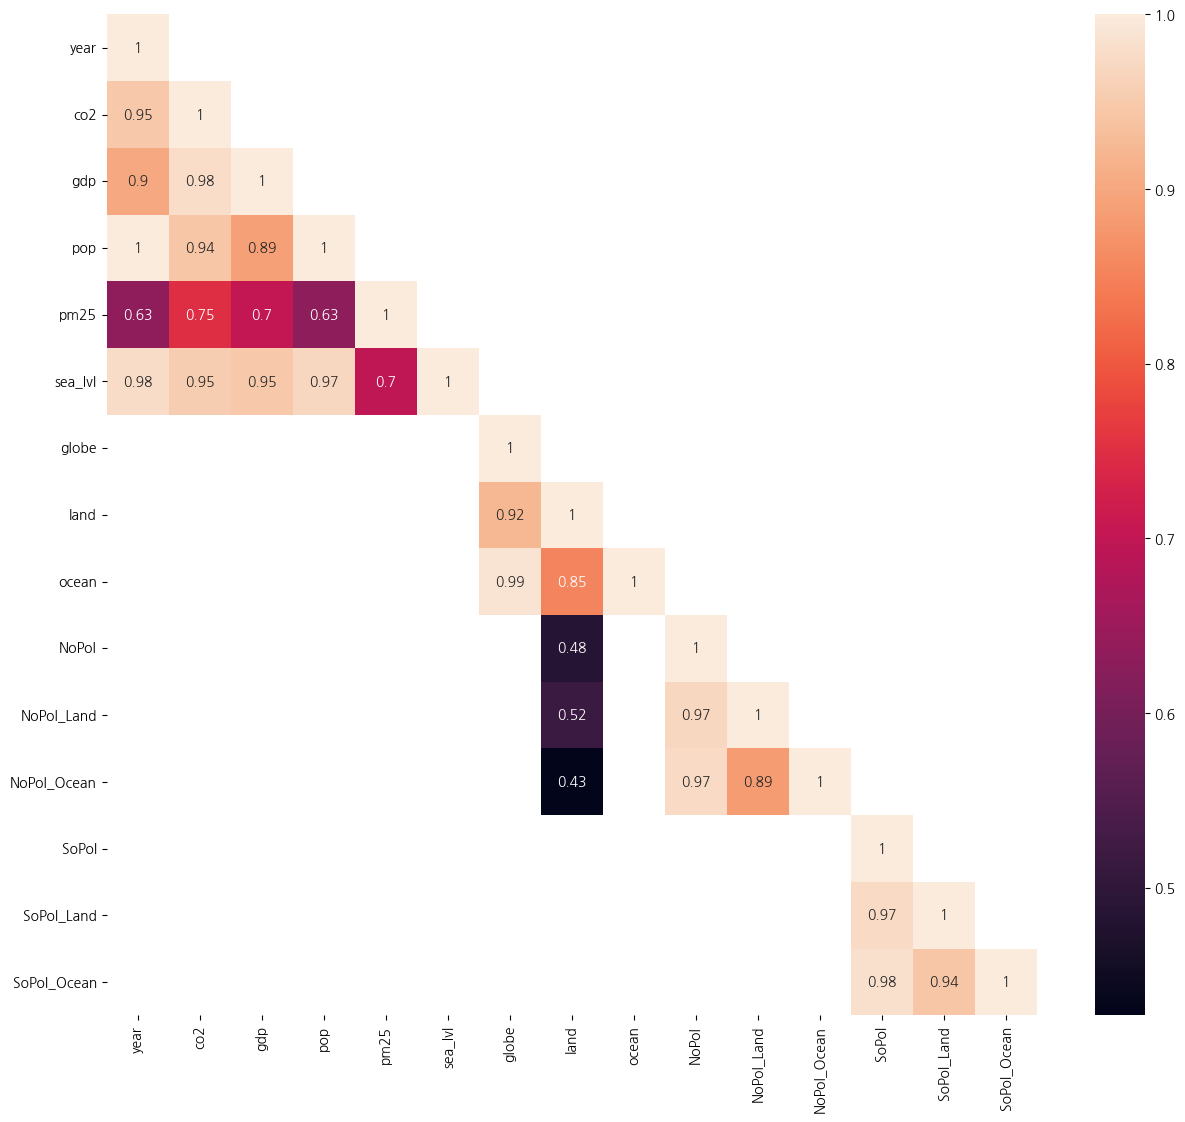

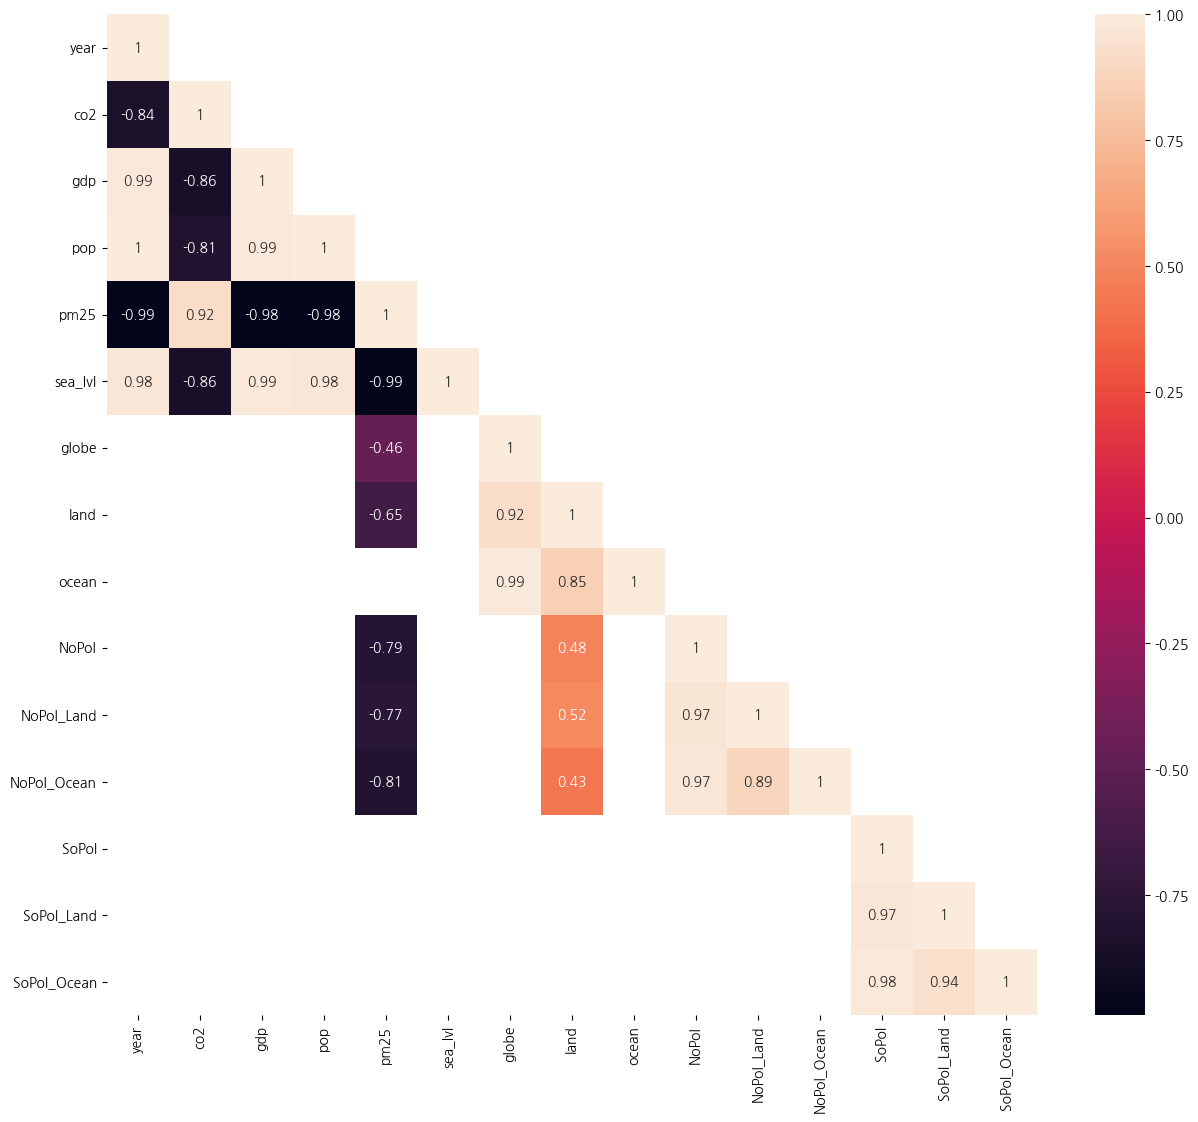

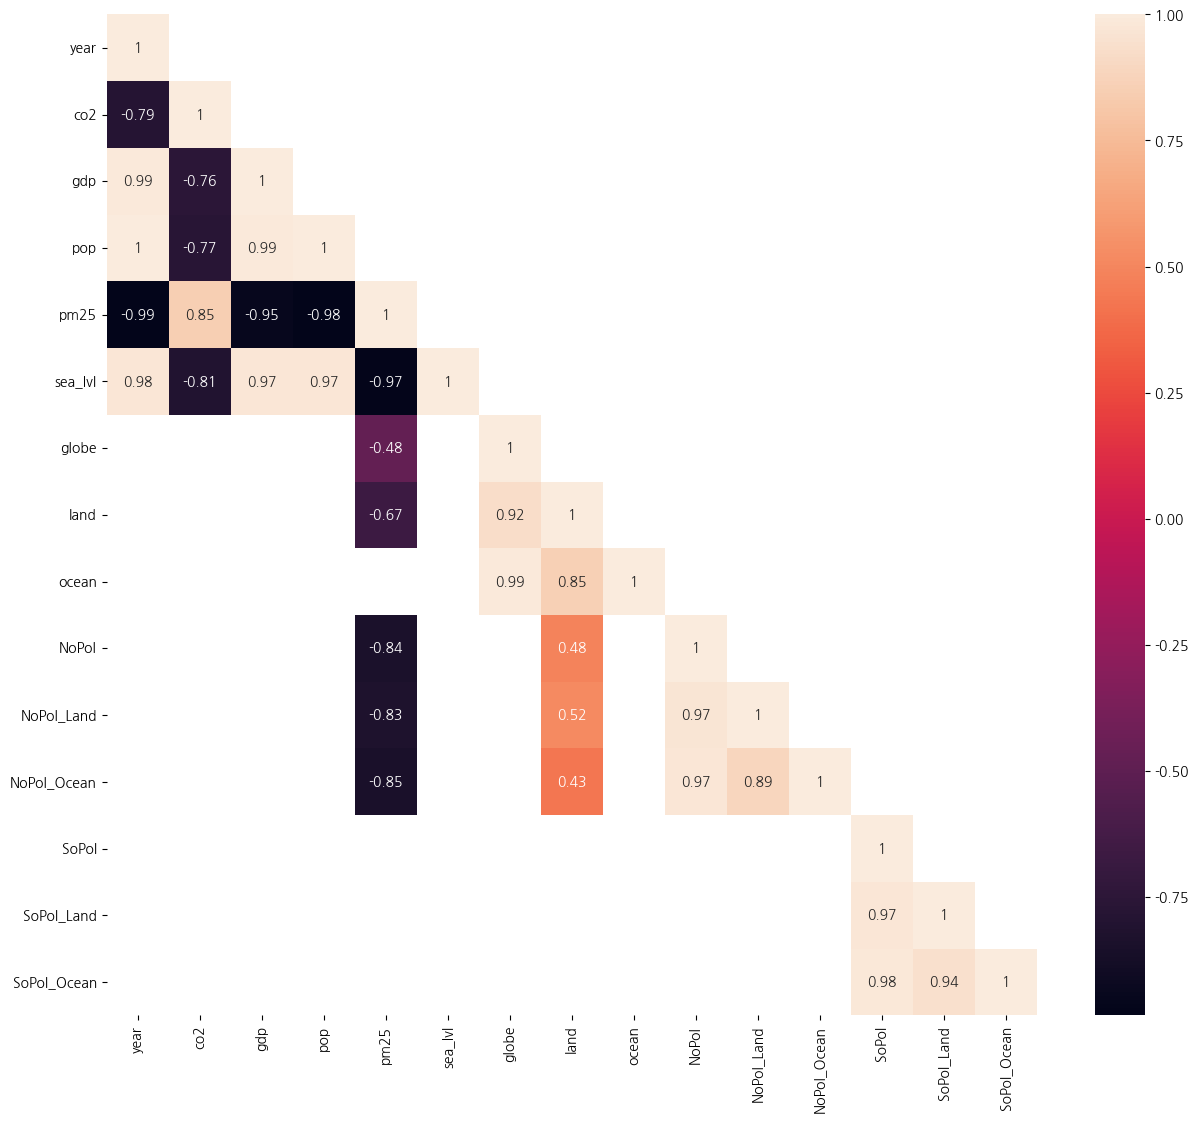

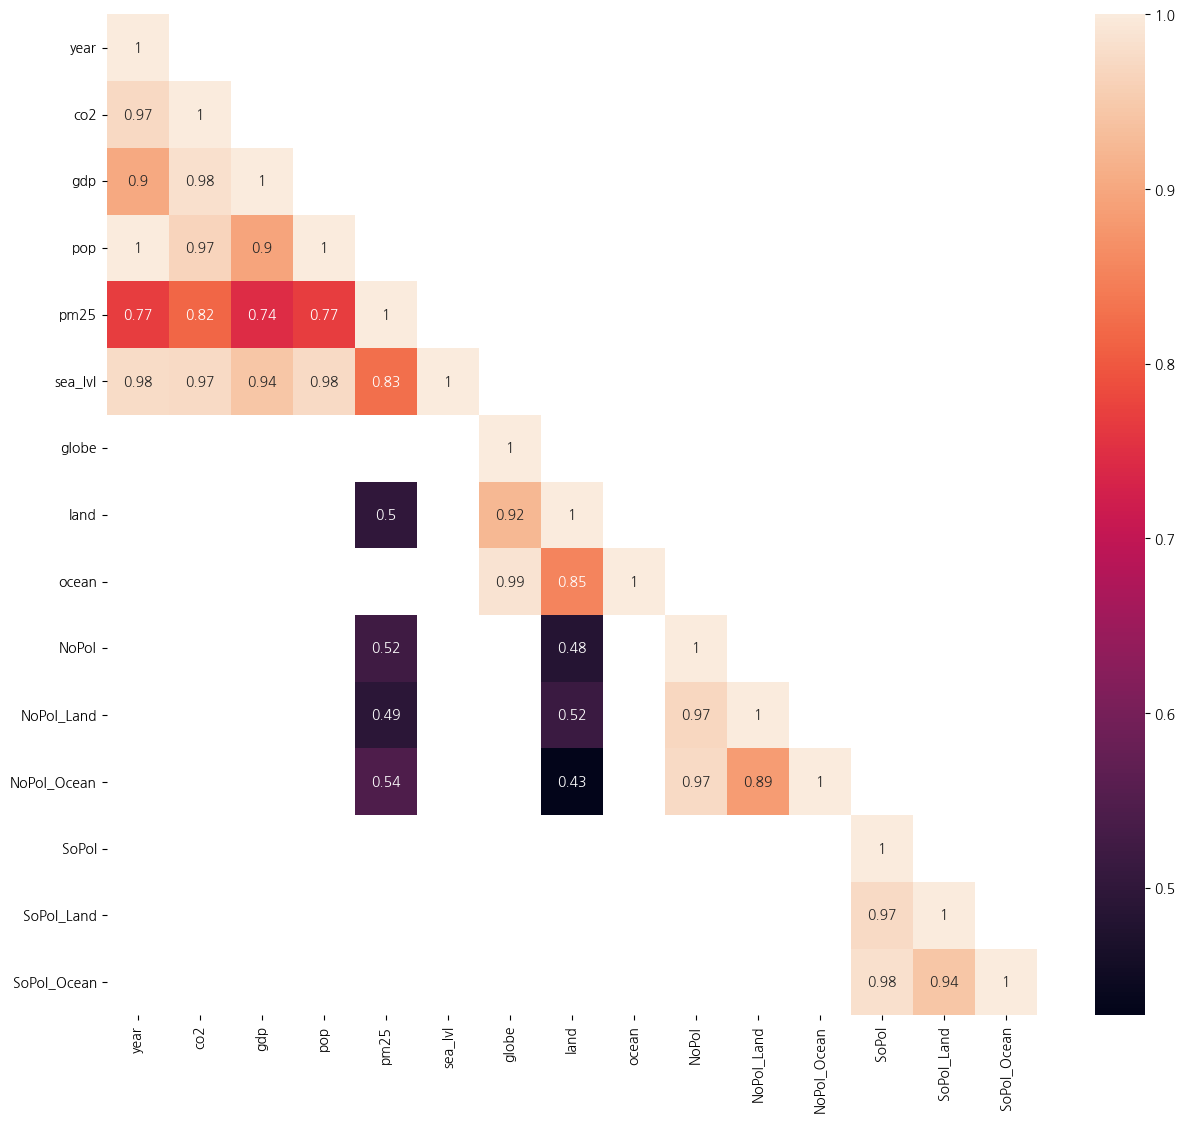

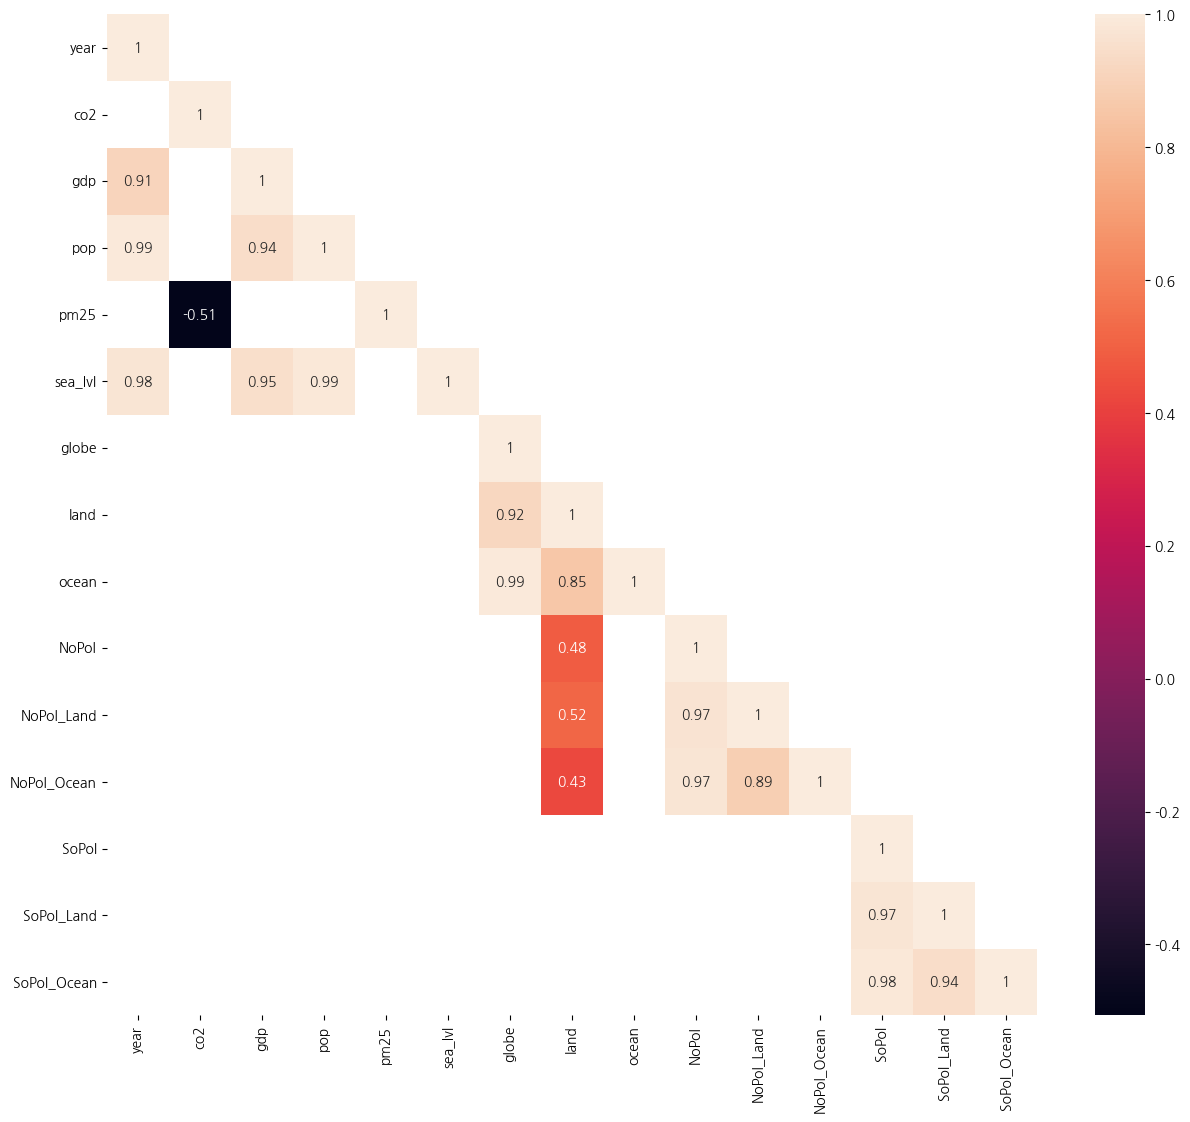

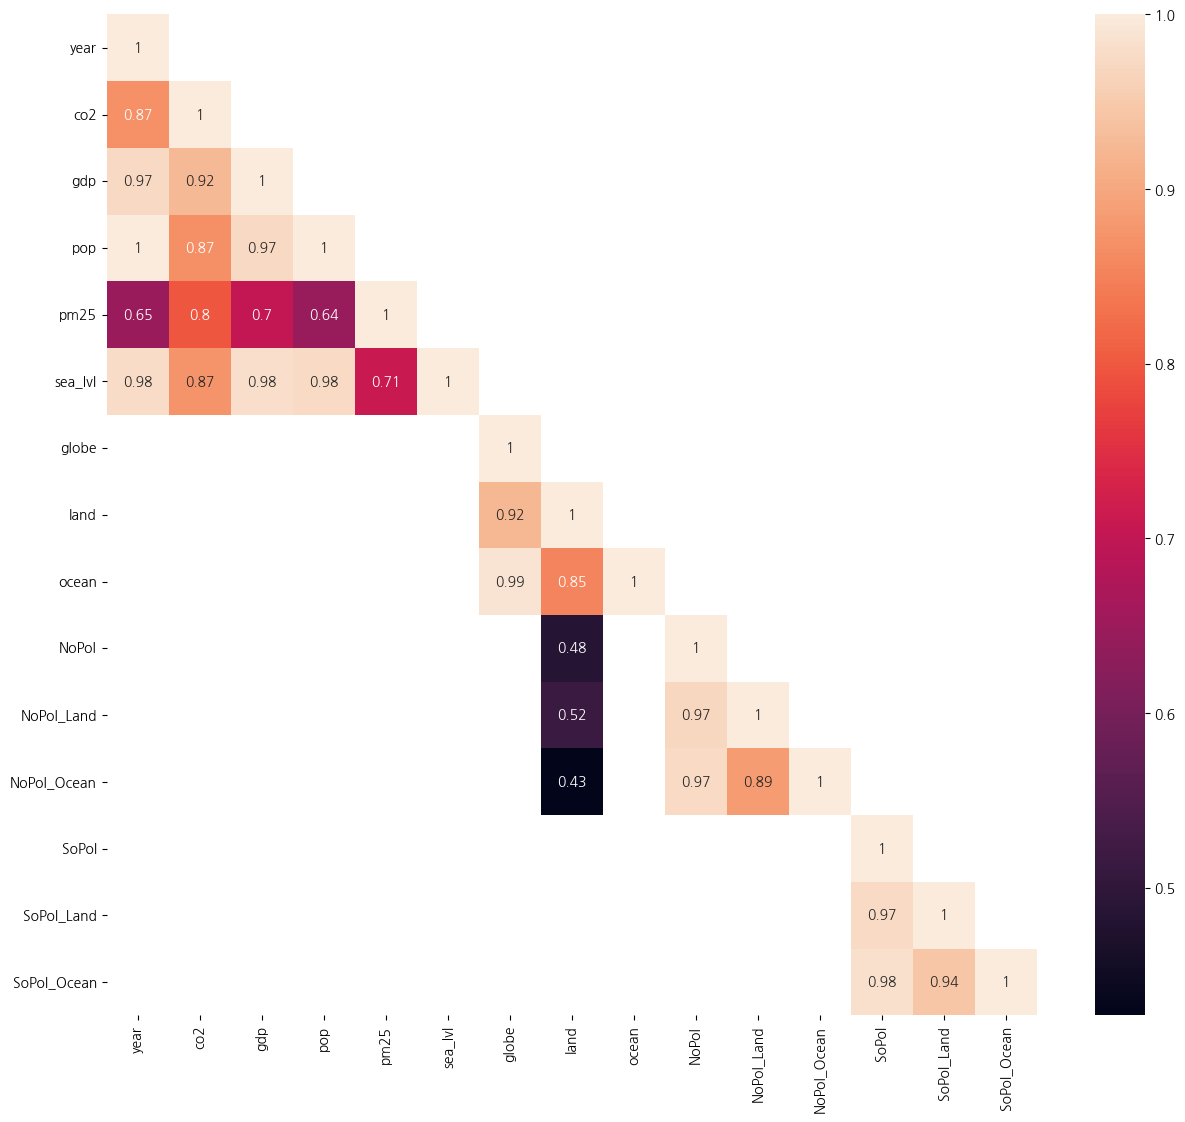

In [4]:
for region in new_regions:
    with open (f'data/regional_data/{region}.pkl', 'rb' ) as f:
        data=pickle.load(f)
    data.sort_values(['year'], inplace=True)
    anal_df = data[['year', 'co2',
       'gdp', 'pop', 'pm25', 'sea_lvl', 'globe', 'land', 'ocean', 'NoPol', 'NoPol_Land',
       'NoPol_Ocean', 'SoPol', 'SoPol_Land', 'SoPol_Ocean']].copy()
    corr_mtx = anal_df.corr()
    mask = np.tril(np.ones_like(corr_mtx, dtype=bool))
    filtered_corr = corr_mtx.where(mask)
    f_corr_mtx = filtered_corr[corr_mtx.abs()>0.4]
    plt.figure(figsize=(15, 13))
    sns.heatmap(f_corr_mtx, annot=True)
    plt.savefig(f'result/{region}_heatmap.png', dpi=300)
    sns.pairplot(anal_df[['year','co2','gdp','pop','pm25','sea_lvl','globe','land','ocean','NoPol','NoPol_Land','NoPol_Ocean']], kind='reg')
    plt.savefig(f'result/{region}_pair_plot.png', dpi=300)
    plt.close()
